# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import warnings

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# check null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
# check duplicate and remove dup records
df.duplicated().sum()
# remove duplicate records
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [10]:
# I want to choose several potential column to the relationship with y
# job, education, default, housing, loan
# And plus additional parameters like - duration: last contact duration

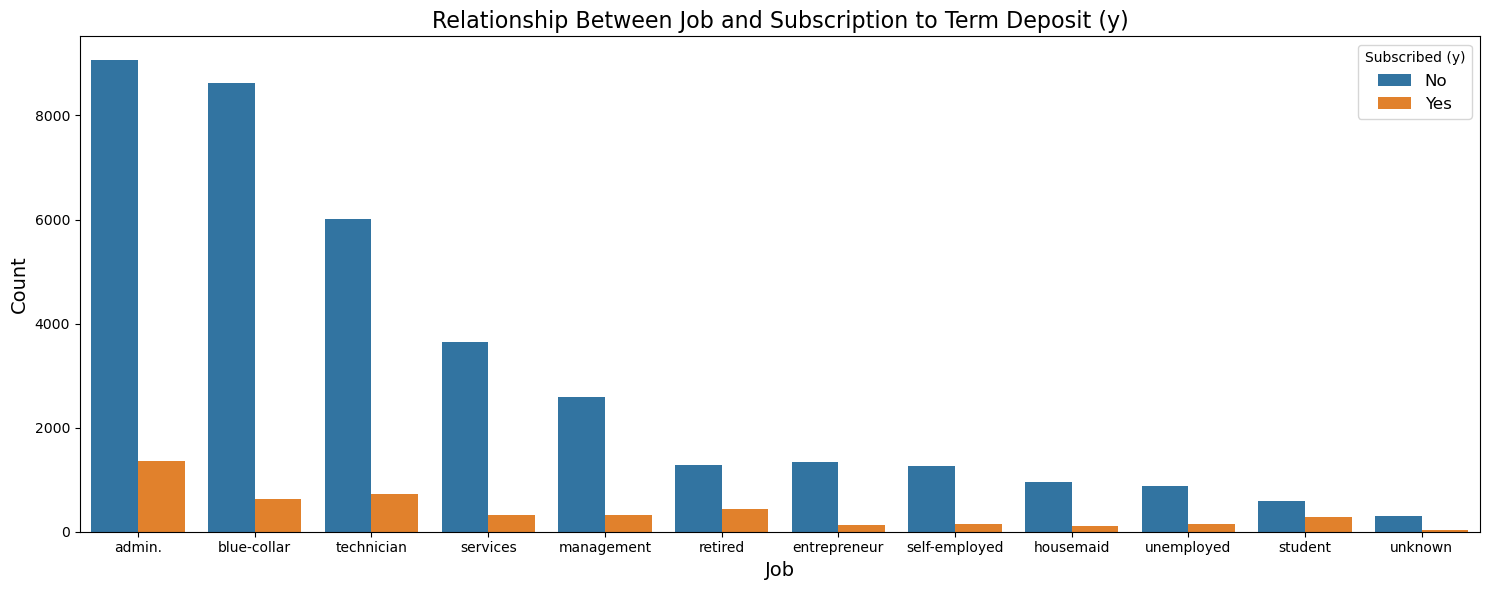

In [11]:
# plot job and y client has submit the term
plt.figure(figsize=(15, 6))
sns.countplot(data = df, x = 'job', hue = 'y', order=df['job'].value_counts().index)
plt.title('Relationship Between Job and Subscription to Term Deposit (y)', fontsize=16)
plt.xlabel('Job', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Subscribed (y)', labels=['No', 'Yes'], fontsize=12)
plt.tight_layout()
plt.show()

<Axes: xlabel='education', ylabel='count'>

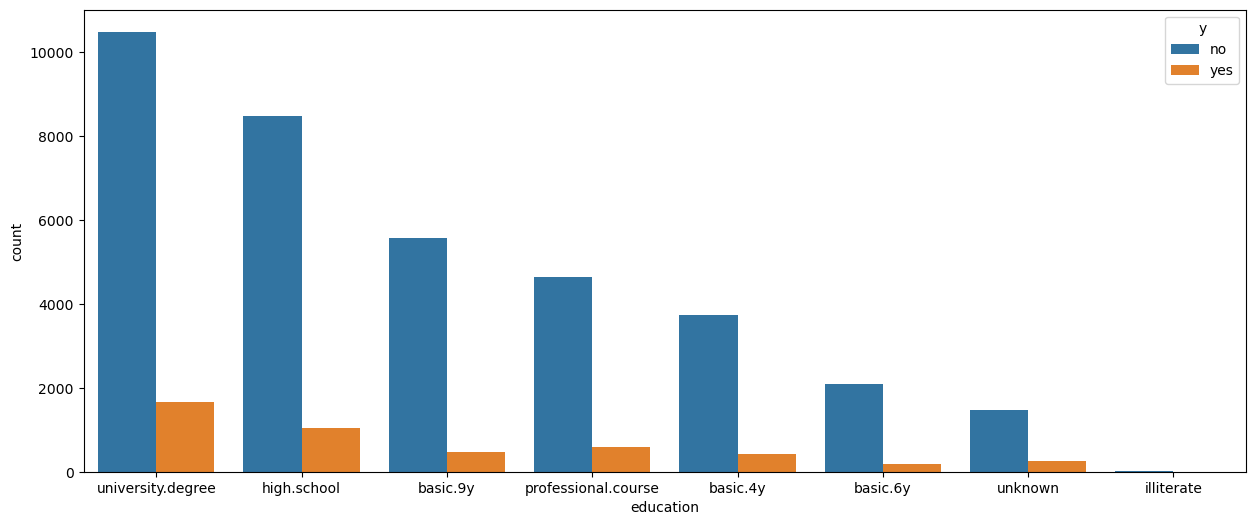

In [12]:
# plot education and y client has submit the term
plt.figure(figsize=(15, 6))
sns.countplot(data = df, x = 'education', hue = 'y', order=df['education'].value_counts().index)

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64
percentage of unknow / total default count: 20.876238585583835%


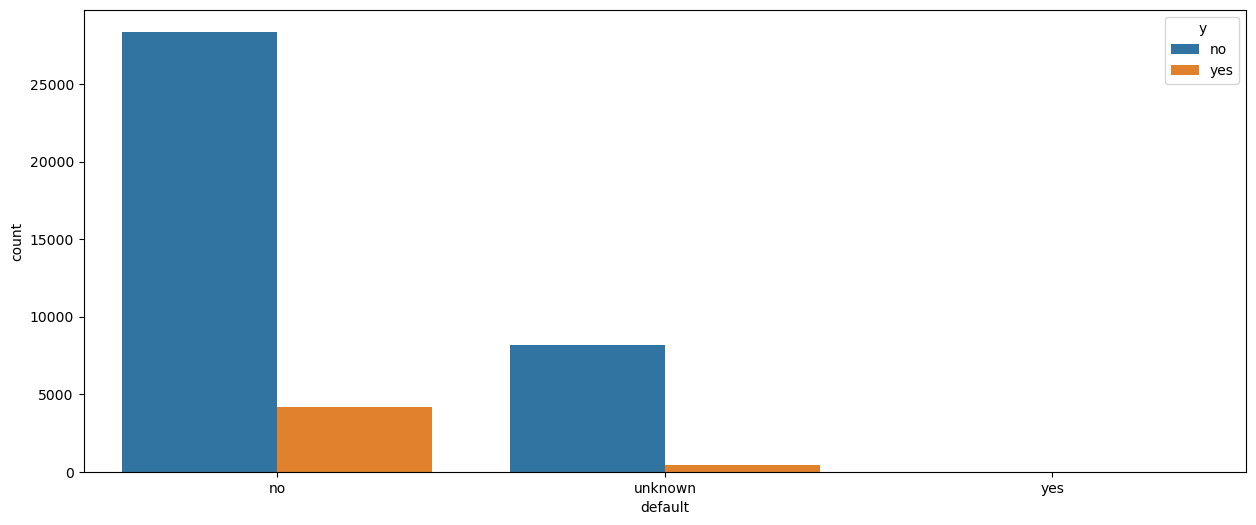

In [13]:
# plot default and y client has submit the term
plt.figure(figsize=(15, 6))
sns.countplot(data = df, x = 'default', hue = 'y', order=df['default'].value_counts().index)
print(df['default'].value_counts())
# percentage of unknow / total default count
default_total = df['default'].value_counts().sum()
unknown_total = df['default'].value_counts()['unknown']
print(f'percentage of unknow / total default count: {unknown_total/default_total * 100}%')
# Because unknown takes 20%, I will not consider default as input column

<Axes: xlabel='housing', ylabel='count'>

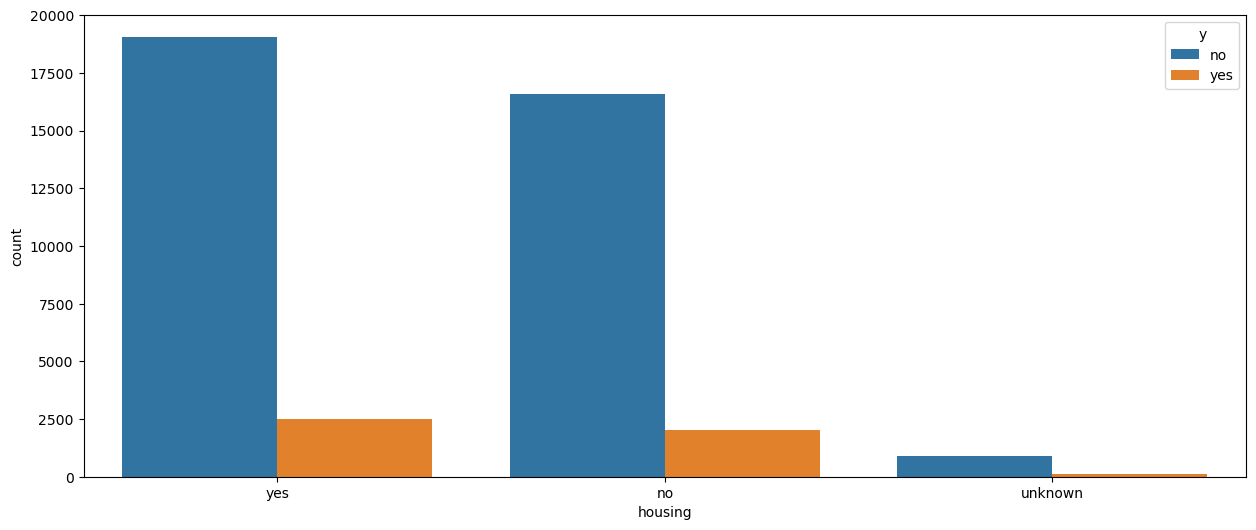

In [14]:
# plot house and y client has submit the term
plt.figure(figsize=(15, 6))
sns.countplot(data = df, x = 'housing', hue = 'y', order=df['housing'].value_counts().index)
# Make sense that person with hourse loan has less chance to sumbit term deposite

<Axes: xlabel='loan', ylabel='count'>

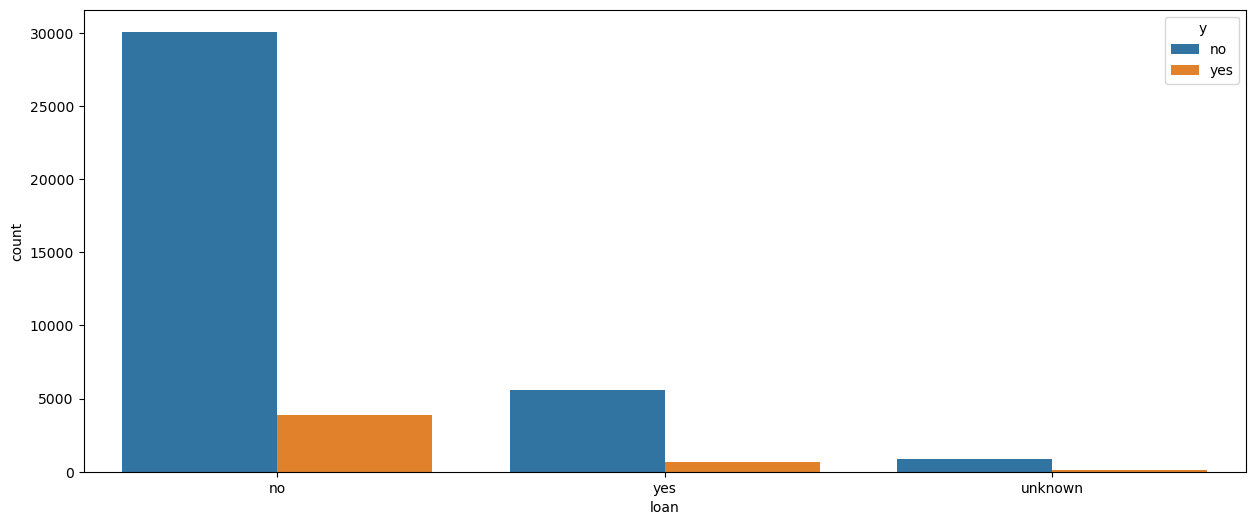

In [15]:
# plot loan and y client has submit the term
plt.figure(figsize=(15, 6))
sns.countplot(data = df, x = 'loan', hue = 'y', order=df['loan'].value_counts().index)
# Make sense that person with personal loan has less chance to sumbit term deposite

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   job_blue-collar                41176 non-null  int64
 1   job_entrepreneur               41176 non-null  int64
 2   job_housemaid                  41176 non-null  int64
 3   job_management                 41176 non-null  int64
 4   job_retired                    41176 non-null  int64
 5   job_self-employed              41176 non-null  int64
 6   job_services                   41176 non-null  int64
 7   job_student                    41176 non-null  int64
 8   job_technician                 41176 non-null  int64
 9   job_unemployed                 41176 non-null  int64
 10  job_unknown                    41176 non-null  int64
 11  education_basic.6y             41176 non-null  int64
 12  education_basic.9y             41176 non-null  int64
 13  education_high.school

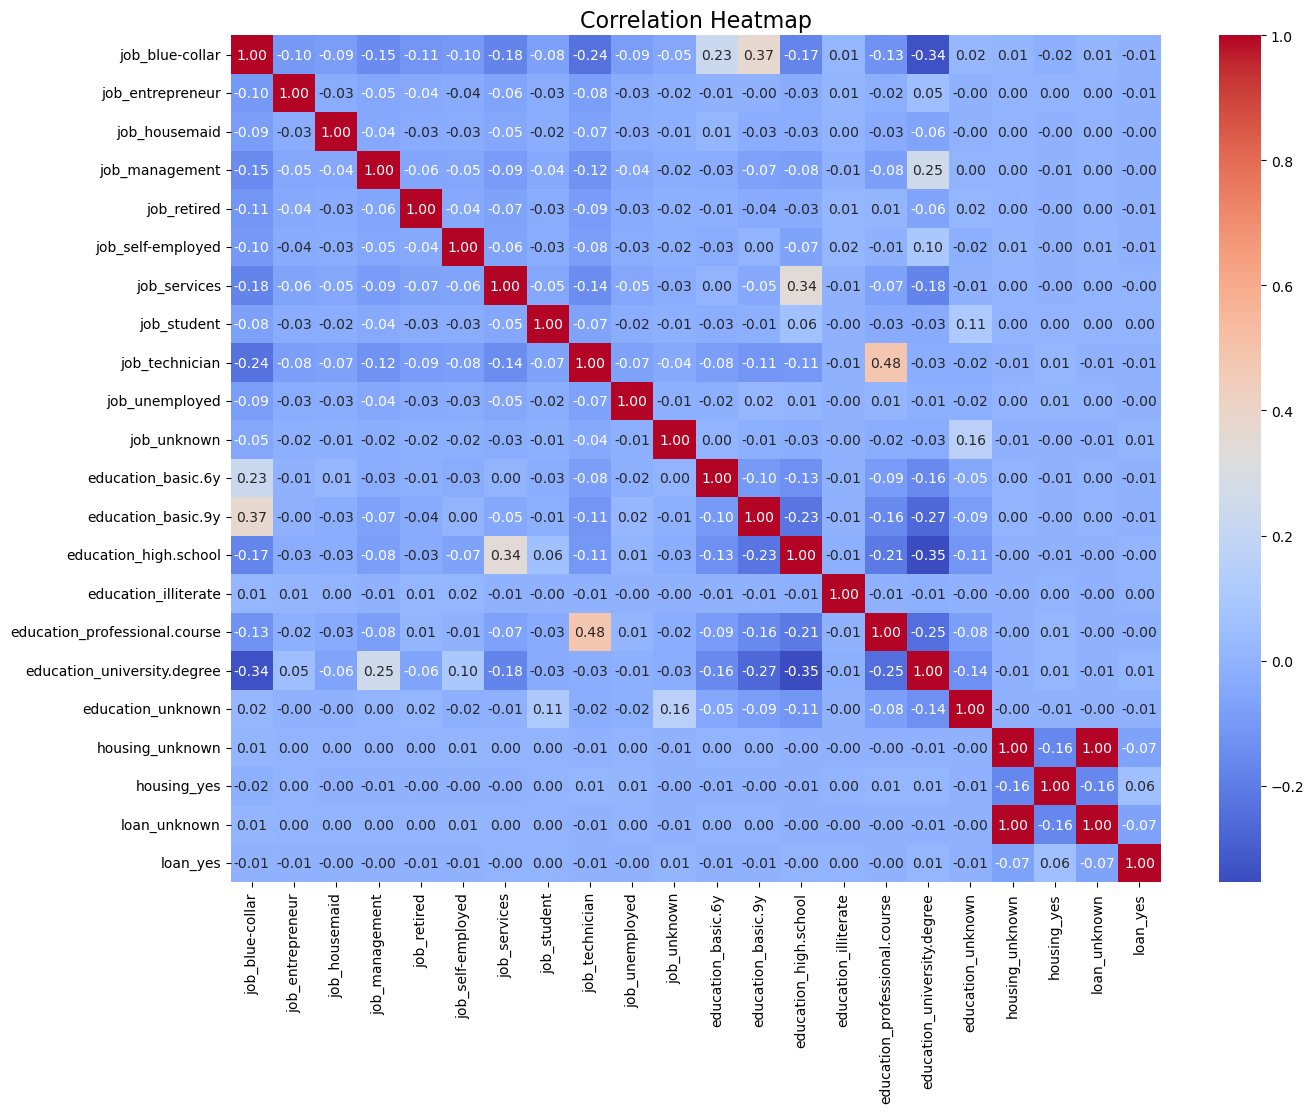

In [16]:
# Let me create input columns set
input_columns = ['job', 'education', 'housing', 'loan']
data_input = df[input_columns]
# Transform non numeric column to numberic using one-hot coding
data_input = pd.get_dummies(data_input, columns = input_columns, drop_first = True)
data_input.sample(1)
# Convert bool to 0 and 1 for better visioning
data_input = data_input.astype(int)
data_input.info()
correlations = data_input.corr()
plt.figure(figsize=(15, 11))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [17]:
# It is good to see input columns has low correlation to each other which is expected and having less chance to be overfitting.

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [18]:
# Split train test data with ['job'] family job_*
job_column = [col for col in data_input.columns if col.startswith('job')]
X_train_job, X_test_job, y_train_job, y_test_job = train_test_split(data_input[job_column], df['y'], test_size=0.2, random_state=42)


# Split train test dataset with full features - input_columns = ['job', 'education', 'housing', 'loan']
X_train, X_test, y_train, y_test = train_test_split(data_input, df['y'], test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [19]:
# Calculate the baseline
print(df['y'].value_counts())
base_percentage = df['y'].value_counts(normalize=True).max() * 100
print(f"Baseline Accuracy (Majority Class) for no subscribe term deposit: {base_percentage:.2f}%")

y
no     36537
yes     4639
Name: count, dtype: int64
Baseline Accuracy (Majority Class) for no subscribe term deposit: 88.73%


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [20]:
# Use logistic regression model to train
log_reg = LogisticRegression()
log_reg.fit(X_train_job, y_train_job)


LogisticRegression()

### Problem 9: Score the Model

What is the accuracy of your model?

In [21]:
y_lr_pred = log_reg.predict(X_test_job)
# check accuracy of logistic regression model
print(f'Accuracy of logistic regression model: {log_reg.score(X_test_job, y_test_job)}')

Accuracy of logistic regression model: 0.8821029626032054


In [22]:
# Use logstic Regression model, the outcome is pretty good.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [23]:
# result_frame = pd.DataFrame(columns = ['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
results_list = []
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
}
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train_job, y_train_job)
    end_time = time.time()
    train_time = end_time - start_time
    train_accuracy = model.score(X_train_job, y_train_job)
    test_accuracy = model.score(X_test_job, y_test_job)
    results_list.append({
        'Model': model_name,
        'Train Time': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
    })
result_frame = pd.DataFrame(results_list)
print(result_frame)

           Model  Train Time  Train Accuracy  Test Accuracy
0            KNN    0.070220        0.888646       0.882103
1  Decision Tree    0.048692        0.888646       0.882103
2            SVM    8.195597        0.888646       0.882103


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [24]:
# Let's optimize model

# Remove _unknown entries which is not helping for the perdicition
column_clean = [col for col in data_input[job_column].columns if not '_unknown' in col]
# It will be ['job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed']
print(column_clean)
X_train_job_new, X_test_job_new, y_train_job_new, y_test_job_new = train_test_split(data_input[column_clean], df['y'], test_size=0.2, random_state=42)
# For KNN, let me exp different neighbor value
param_grid = {'n_neighbors': [3, 4, 5]}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
knn_grid.fit(X_train_job_new, y_train_job_new)
print(f"Best Parameters for KNN: {knn_grid.best_params_}")
print(f"Best CV Accuracy for KNN: {knn_grid.best_score_:.4f}")

['job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed']
Best Parameters for KNN: {'n_neighbors': 3}
Best CV Accuracy for KNN: 0.8886


In [25]:
# Let's include more features - 'education', 'housing', 'loan'
# Use: X_train, X_test, y_train, y_test = train_test_split(data_input, df['y'], test_size=0.2, random_state=42)
results_list_more_features = []
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    results_list_more_features.append({
        'Model': model_name,
        'Train Time': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
    })
result_frame = pd.DataFrame(results_list_more_features)
print(result_frame)

           Model  Train Time  Train Accuracy  Test Accuracy
0            KNN    0.047644        0.884214       0.876639
1  Decision Tree    0.056200        0.888980       0.882224
2            SVM   10.463579        0.888646       0.882103


In [26]:
# With considering education, housing, loan as long as job, accurancy increases. Decision Tree is still the best
# For decision Tree, let's tune the max depth
param_grid = {'max_depth': [3, 4, 5, None]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best max_depth: {grid_search.best_params_['max_depth']}")

Best max_depth: 3


In [27]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
cv_results = {}
X = data_input
y = df['y']
for name, model in models.items():
    scores = cross_val_score(model, X,  y, cv=5, scoring='accuracy')  # 5-fold CV
    cv_results[name] = scores.mean()

# Display cross-validation results
for model, score in cv_results.items():
    print(f"{model}: Mean CV Accuracy = {score:.4f}")

KNN: Mean CV Accuracy = 0.8574
Decision Tree: Mean CV Accuracy = 0.8859
SVM: Mean CV Accuracy = 0.8861


Cross validation also reflected the best model will be decision Tree.

##### Questions